Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


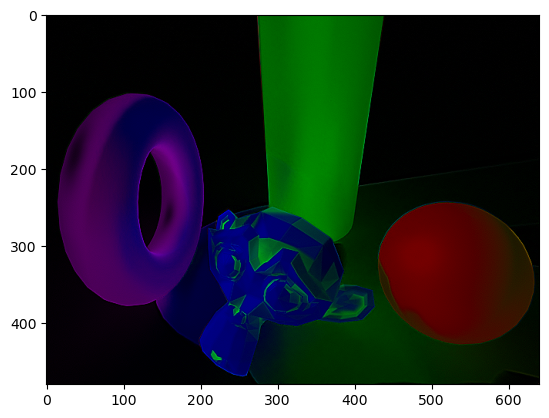

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy import ndimage, datasets
from skimage.metrics import structural_similarity as ssim
from canny import canny
from imageio.v2 import imread, imsave
%matplotlib inline

def pltshow(image):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

def normalize(image):
    return (image - np.min(image)) / (np.max(image) - np.min(image))

def dice_coef(y_true, y_pred):
    y_true_f = y_true.flatten()
    y_pred_f = y_pred.flatten()
    intersection = np.sum(y_true_f * y_pred_f)
    return (2. * intersection) / (np.sum(y_true_f) + np.sum(y_pred_f))


# Load the albedo and shading images. These should be in the same size.
albedo = cv2.imread('reuslts/albedo/Image0138.png', cv2.IMREAD_COLOR).astype(np.float32) / 255
shading = cv2.imread('reuslts/shading/Image0138.png', cv2.IMREAD_COLOR).astype(np.float32) / 255
image = cv2.imread('reuslts/image/Image0138.png', cv2.IMREAD_COLOR).astype(np.float32) / 255
dip_shading = cv2.imread('output/textures_shading.jpg', cv2.IMREAD_GRAYSCALE).astype(np.float32) / 255

albedo_gray = np.mean(albedo, axis=2)
shading_gray = np.mean(shading, axis=2)
image_gray = np.mean(image, axis=2)

albedo_hsv = cv2.cvtColor(albedo, cv2.COLOR_BGR2HSV)
shading_hsv = cv2.cvtColor(shading, cv2.COLOR_BGR2HSV)
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)


# Multiply the albedo and shading images
recovered = np.multiply(albedo, shading)

sobel_albedo = ndimage.laplace(albedo)
sobel_shading = ndimage.laplace(shading)
sobel_image = ndimage.laplace(image)

#sobel_albedo = normalize(ndimage.laplace(albedo))
#sobel_shading = normalize(ndimage.laplace(shading))
#sobel_image = normalize(ndimage.laplace(image))

_, sobel_albedo_bin = cv2.threshold(sobel_albedo, 0, 1, cv2.THRESH_BINARY)

# Save the recovered image
gray_raw_image = image
pltshow(sobel_image)

img = imread('reuslts/image/Image0138.png') / 255.0
canny_image = canny.canny(img, use_cuda=True)
img = imread('reuslts/shading/Image0138.png') / 255.0
canny_shading = canny.canny(img, use_cuda=True)
img = imread('reuslts/albedo/Image0138.png') / 255.0
canny_albedo = canny.canny(img, use_cuda=True)


In [3]:
v_shading = shading_hsv[:, :, 2]
v_albedo = albedo_hsv[:, :, 2]
v_image = image_hsv[:, :, 2]
print(np.linalg.norm(v_shading - v_image))

44.68593


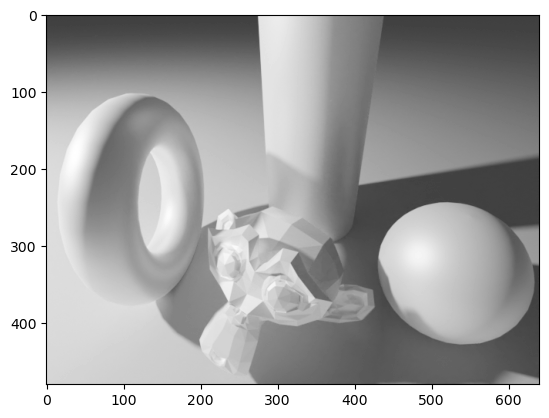

In [4]:
plt.imshow(v_image, cmap='gray', vmin=0, vmax=1)

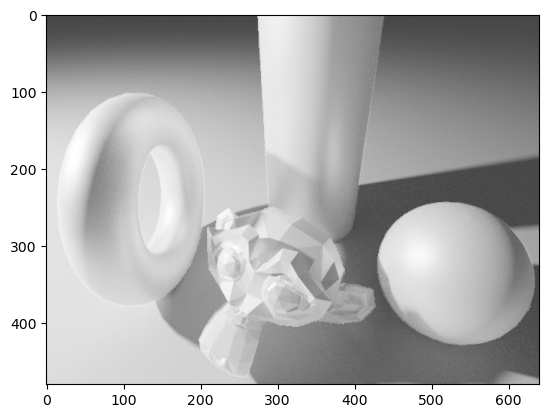

In [5]:
plt.imshow(v_shading, cmap='gray', vmin=0, vmax=1)

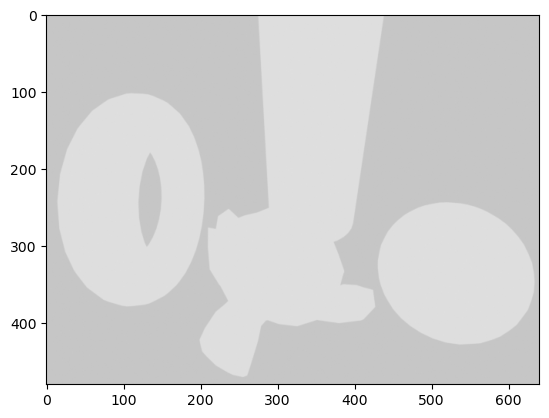

In [6]:
plt.imshow(v_albedo, cmap='gray', vmin=0, vmax=1)

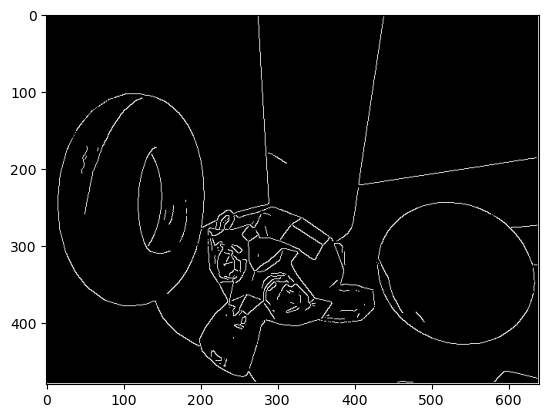

In [13]:
plt.imshow(canny_image, cmap='gray', vmin=0, vmax=1)

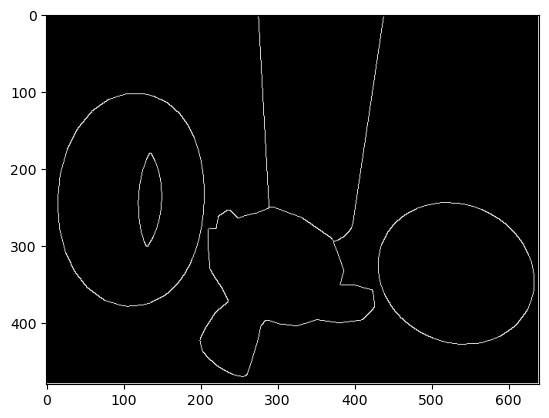

In [14]:
plt.imshow(canny_albedo, cmap='gray', vmin=0, vmax=1)

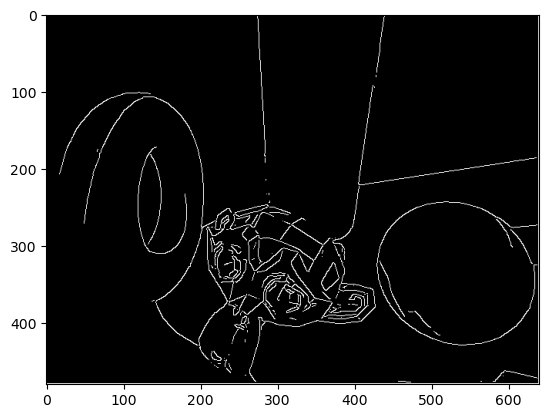

In [15]:
plt.imshow(canny_shading, cmap='gray', vmin=0, vmax=1)

5999.0
4755.0
52.0
37.0
80.0
2899.0


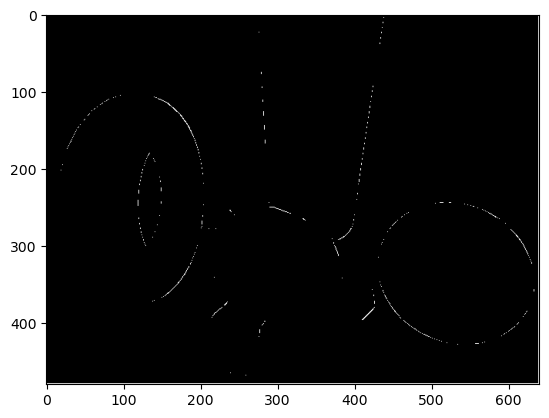

In [18]:
plt.imshow(canny_shading * canny_albedo, cmap='gray')
print(np.sum(canny_image * canny_shading))
print(np.sum(canny_image * canny_albedo))
print(np.linalg.norm(canny_shading - canny_image, ord=1))
print(np.linalg.norm(canny_albedo - canny_image, ord=1))
print(np.linalg.norm(canny_shading - canny_albedo, ord=1))
print(np.sum(canny_image * canny_albedo * canny_shading))

In [81]:
print(dice_coef(canny_image, canny_albedo + canny_shading - canny_shading * canny_albedo))
print(dice_coef(canny_image, canny_shading))

0.7691177910506217
0.6719686362363484


In [82]:
print(np.linalg.norm(canny_image - canny_albedo))

68.46166810705097


(array([301685.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,   5515.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

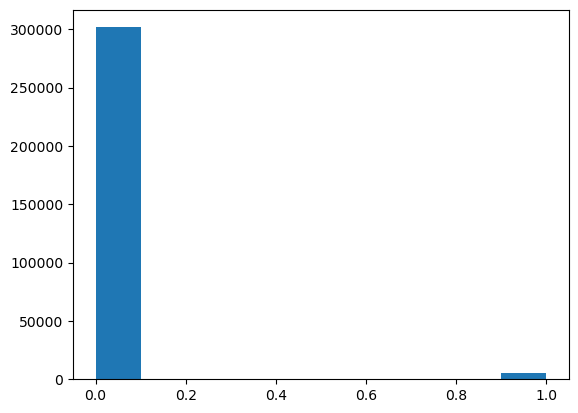

In [83]:
counts, bins = np.histogram(canny_albedo, 10)
plt.hist(bins[:-1], bins, weights=counts)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.055511467


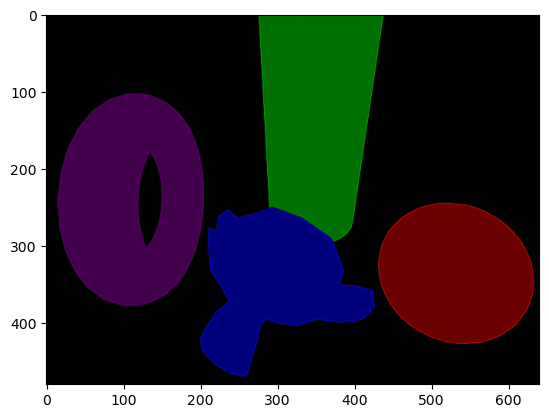

In [84]:
#pltshow(sobel_albedo)
#gray_albedo = np.mean(sobel_albedo, axis=2)
pltshow(sobel_albedo)

print(np.var(sobel_albedo))

C:\Users\lucien\AppData\Local\Temp\ipykernel_26632\2203296128.py:3: RuntimeWarning: divide by zero encountered in log
  res = np.log(np.abs(fshift))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


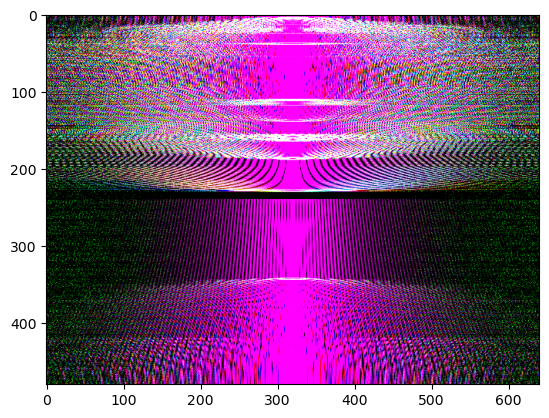

In [85]:
f = np.fft.fft2(sobel_albedo)
fshift = np.fft.fftshift(f)
res = np.log(np.abs(fshift))
plt.imshow(res, 'gray')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.009022562


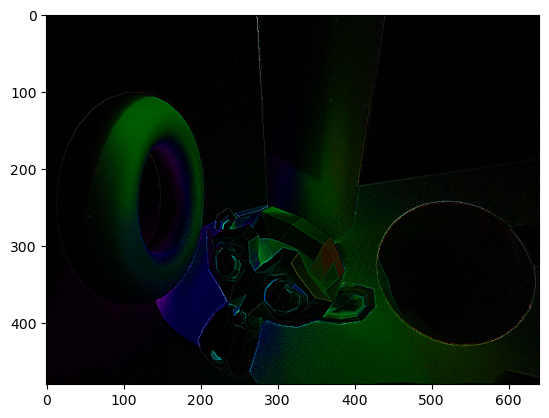

In [86]:
#pltshow(sobel_shading)
pltshow(sobel_shading)
print(np.var(sobel_shading))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


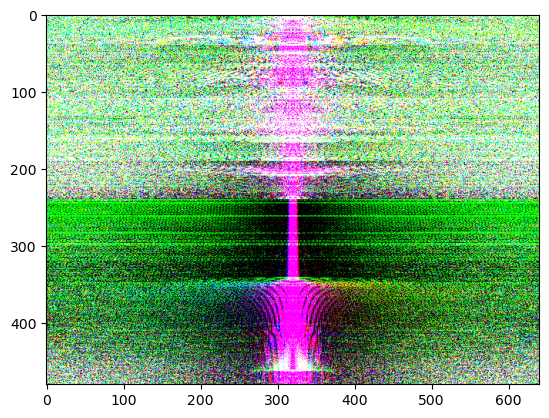

In [87]:
f = np.fft.fft2(sobel_shading)
fshift = np.fft.fftshift(f)
res = np.log(np.abs(fshift))
plt.imshow(res, 'gray')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.05167558


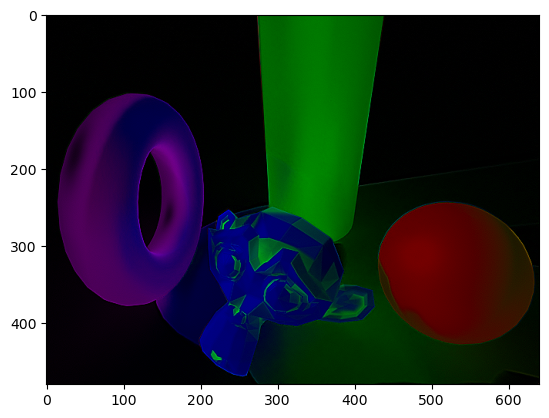

In [88]:
#pltshow(sobel_image)

pltshow(sobel_image)
print(np.var(sobel_image))

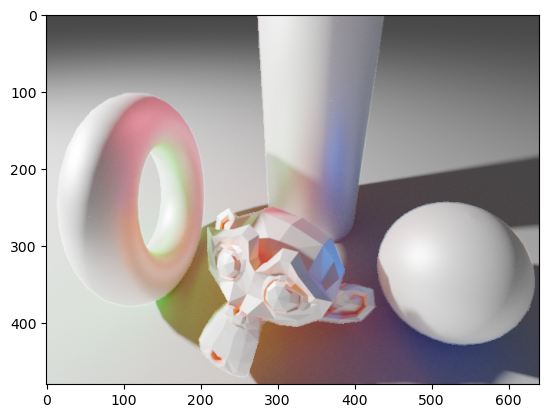

In [89]:
pltshow(shading)

In [90]:
print(np.linalg.norm(sobel_image - sobel_albedo - sobel_shading))
print(np.linalg.norm(sobel_image - sobel_albedo))
print(np.linalg.norm(sobel_image - sobel_shading))

90.00403
103.203476
219.23705


In [91]:
(score, diff) = ssim(sobel_image, sobel_shading, full=True)
pltshow(diff)
print(score)

ValueError: win_size exceeds image extent. Either ensure that your images are at least 7x7; or pass win_size explicitly in the function call, with an odd value less than or equal to the smaller side of your images. If your images are multichannel (with color channels), set channel_axis to the axis number corresponding to the channels.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.9319554910937028


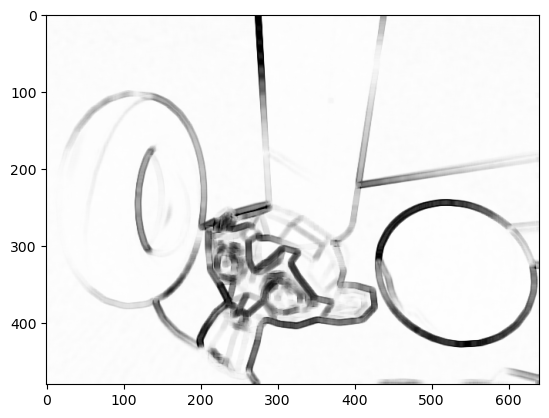

In [ ]:
(score, diff) = ssim(sobel_image, sobel_albedo, full=True)
pltshow(diff)
print(score)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


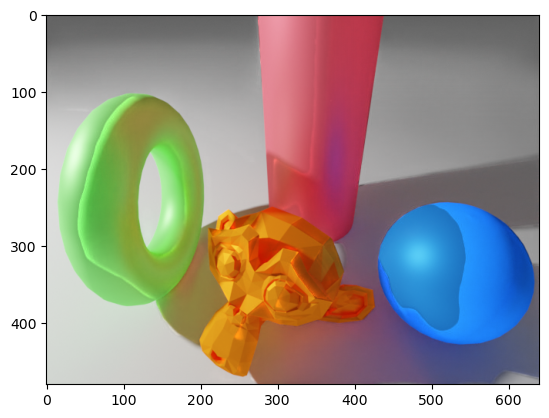

In [113]:
dip_albedo = image.copy()
dip_albedo[:, :, 0] /= dip_shading
dip_albedo[:, :, 1] /= dip_shading
dip_albedo[:, :, 2] /= dip_shading
pltshow(dip_albedo)

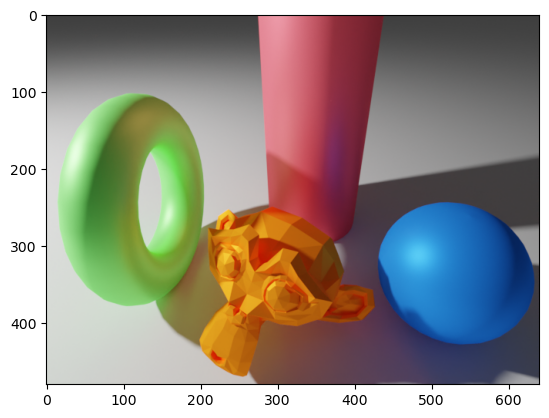

In [109]:
pltshow(image)

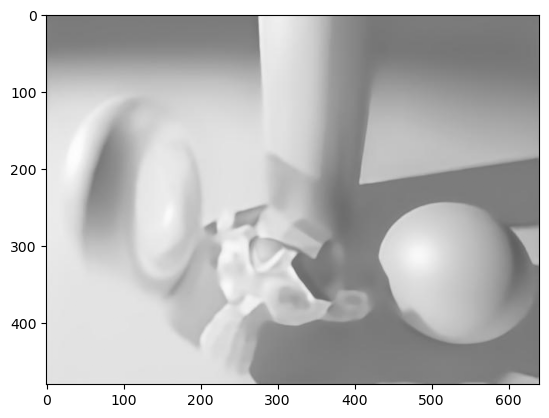

In [ ]:
pltshow(dip_shading)

In [110]:
image = cv2.imread('reuslts/image/Image0138.png', cv2.IMREAD_COLOR).astype(np.float32) / 255
image_hsv = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2HSV)
vi = image_hsv[:, :, 2]
vi[vi<=0.25] = 0
vi[vi>=0.75] = 1
d_image = cv2.cvtColor(image_hsv, cv2.COLOR_HSV2BGR)

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


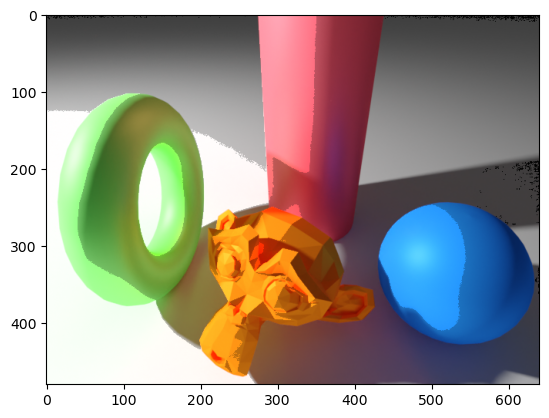

In [111]:
pltshow(d_image)
imsave('d_image.png', d_image)

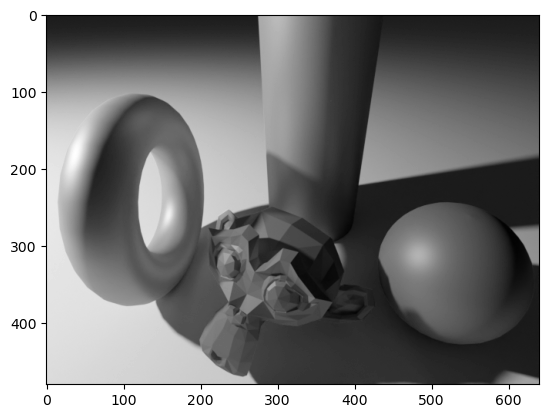

In [115]:
plt.imshow(image_gray, cmap="gray")

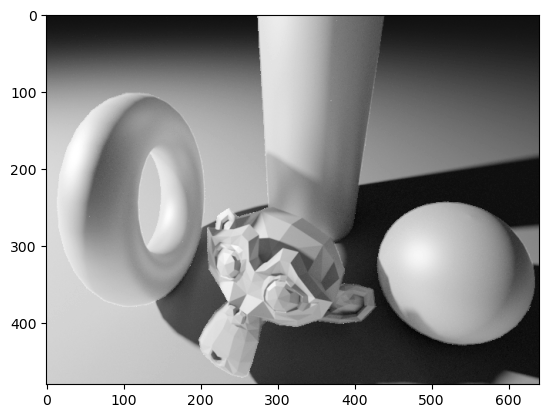

In [116]:
plt.imshow(shading_gray, cmap="gray")

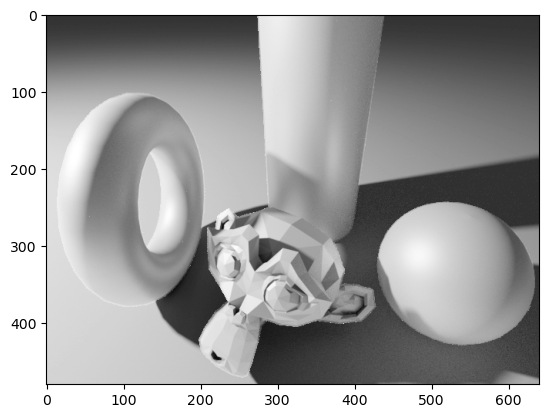

In [118]:
plt.imshow(shading[:, :, 0], cmap="gray")

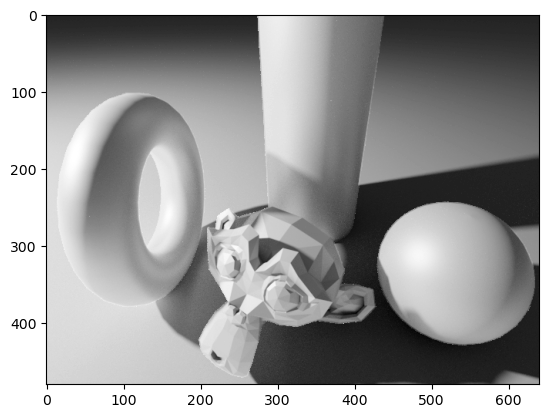

In [119]:
plt.imshow(shading[:, :, 1], cmap="gray")

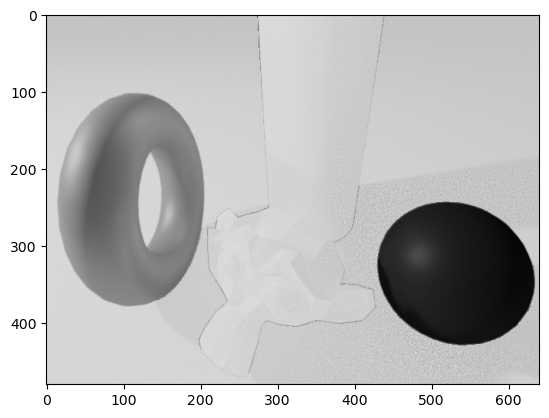

In [122]:
plt.imshow(image[:, :, 2] / shading[:, :, 2], cmap="gray")

In [21]:
import os

model_path = "C:\\Users\\lucien\\Github\\CGVI-Project\\ShapeNetCore.v2\\02691156\\02691156"

for root,dirs,files in os.walk(model_path):
    for name in files:
        if name.endswith(".obj"):
            print(os.path.join(root, name))


C:\Users\lucien\Github\CGVI-Project\ShapeNetCore.v2\02691156\02691156\10155655850468db78d106ce0a280f87\models\model_normalized.obj
C:\Users\lucien\Github\CGVI-Project\ShapeNetCore.v2\02691156\02691156\1021a0914a7207aff927ed529ad90a11\models\model_normalized.obj
C:\Users\lucien\Github\CGVI-Project\ShapeNetCore.v2\02691156\02691156\1026dd1b26120799107f68a9cb8e3c\models\model_normalized.obj
C:\Users\lucien\Github\CGVI-Project\ShapeNetCore.v2\02691156\02691156\103c9e43cdf6501c62b600da24e0965\models\model_normalized.obj
C:\Users\lucien\Github\CGVI-Project\ShapeNetCore.v2\02691156\02691156\105f7f51e4140ee4b6b87e72ead132ed\models\model_normalized.obj
C:\Users\lucien\Github\CGVI-Project\ShapeNetCore.v2\02691156\02691156\1066b65c30d153e04c3a35cee92bb95b\models\model_normalized.obj
C:\Users\lucien\Github\CGVI-Project\ShapeNetCore.v2\02691156\02691156\106dfe858cb8fbc2afc6b80d80a265ab\models\model_normalized.obj
C:\Users\lucien\Github\CGVI-Project\ShapeNetCore.v2\02691156\02691156\10aa040f470500c6